<a href="https://colab.research.google.com/github/sagar625/SalaryPrediction/blob/master/SalaryPrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This Notebook will predict salary of a new job posting based on model created by historical data.

In [0]:
__author__ = "Sagar Goswami"
__email__ = "sagar7958@gmail.com"

In [0]:
#Getting data from Dropbox 
!curl -L -o SalaryData.zip https://www.dropbox.com/sh/bh5rp4oaao5y8mt/AABpWmMOb4oUFHdJ28nABAo8a?dl=0
!unzip SalaryData.zip

In [0]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="darkgrid")



In [0]:
features= pd.read_csv("train_features.csv")
target = pd.read_csv("train_salaries.csv")
features.shape, target.shape


((1000000, 8), (1000000, 2))

In [0]:
features.info()  ,
target.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 8 columns):
jobId                  1000000 non-null object
companyId              1000000 non-null object
jobType                1000000 non-null object
degree                 1000000 non-null object
major                  1000000 non-null object
industry               1000000 non-null object
yearsExperience        1000000 non-null int64
milesFromMetropolis    1000000 non-null int64
dtypes: int64(2), object(6)
memory usage: 61.0+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 2 columns):
jobId     1000000 non-null object
salary    1000000 non-null int64
dtypes: int64(1), object(1)
memory usage: 15.3+ MB


In [0]:
target.drop_duplicates()

,jobId,salary
0,JOB1362684407687,130
1,JOB1362684407688,101
2,JOB1362684407689,137
3,JOB1362684407690,142
4,JOB1362684407691,163
...,...,...
999995,JOB1362685407682,88
999996,JOB1362685407683,160
999997,JOB1362685407684,64
999998,JOB1362685407685,149


In [0]:
training_set_with_label = pd.merge(features,target,on='jobId')

In [0]:
training_set_with_label.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000000 entries, 0 to 999999
Data columns (total 9 columns):
jobId                  1000000 non-null object
companyId              1000000 non-null object
jobType                1000000 non-null object
degree                 1000000 non-null object
major                  1000000 non-null object
industry               1000000 non-null object
yearsExperience        1000000 non-null int64
milesFromMetropolis    1000000 non-null int64
salary                 1000000 non-null int64
dtypes: int64(3), object(6)
memory usage: 76.3+ MB


In [0]:
training_set_with_label.describe()

,yearsExperience,milesFromMetropolis,salary
count,1000000.000000,1000000.000000,1000000.000000
mean,11.992386,49.529260,116.061818
std,7.212391,28.877733,38.717936
min,0.000000,0.000000,0.000000
25%,6.000000,25.000000,88.000000
50%,12.000000,50.000000,114.000000
75%,18.000000,75.000000,141.000000
max,24.000000,99.000000,301.000000


In [0]:
training_set_with_label.describe(include='object')

,jobId,companyId,jobType,degree,major,industry
count,1000000,1000000,1000000,1000000,1000000,1000000
unique,1000000,63,8,5,9,7
top,JOB1362685202332,COMP39,SENIOR,HIGH_SCHOOL,NONE,WEB
freq,1,16193,125886,236976,532355,143206


In [0]:
training_set_with_label.corr()['salary']

yearsExperience        0.375013
milesFromMetropolis   -0.297666
salary                 1.000000
Name: salary, dtype: float64

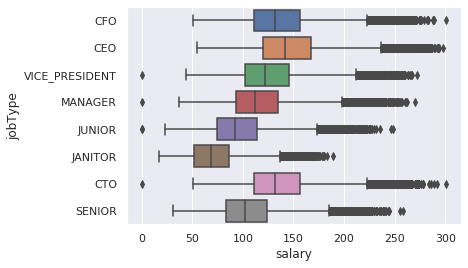

In [0]:
sns.boxplot('salary','jobType',data=training_set_with_label)

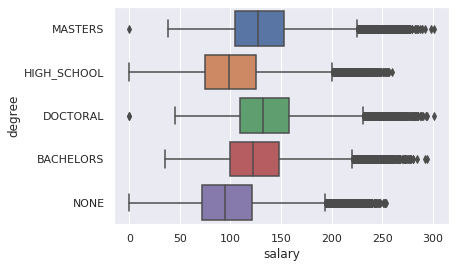

In [0]:
sns.boxplot('salary','degree',data=training_set_with_label)

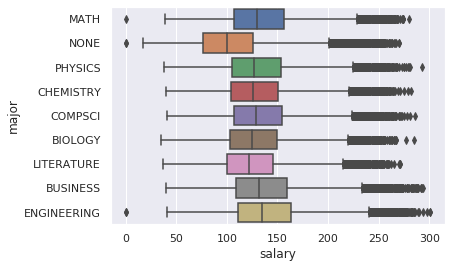

In [0]:
sns.boxplot('salary','major',data=training_set_with_label)

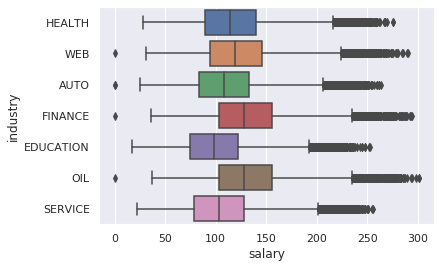

In [0]:
sns.boxplot('salary','industry',data=training_set_with_label)